In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import geopandas as gpd


import functools


%matplotlib inline

import geojson

import json

plt.rcParams['figure.figsize'] = [10, 10]
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

pd.set_option('display.float_format', '{:.2f}'.format)


### Total

In [2]:
# load handedly sort visit count to recreation
visit_count_total=pd.read_csv('../data_save/category_with_tract/Total.csv')
visit_count_total=visit_count_total.rename(columns={'mar_19':'2019_tot','mar_20':'2020_tot','mar_21':'2021_tot'})
visit_count_total.head()

,tract_id,2019_tot,2020_tot,2021_tot
0,36005000200,835,451,493
1,36005000400,3986,1970,2008
2,36005001600,337,119,81
3,36005001900,1555,1369,766
4,36005002300,1813,1309,700


### Education

In [3]:
# load handedly sort visit count to recreation
visit_count_edu=pd.read_csv('../data_save/category_with_tract/Education.csv')
visit_count_edu=visit_count_edu.rename(columns={'mar_19':'2019_edu','mar_20':'2020_edu','mar_21':'2021_edu'})
visit_count_edu.head()


,tract_id,2019_edu,2020_edu,2021_edu
0,36005000200,0,0,0
1,36005000400,0,0,0
2,36005001600,0,0,0
3,36005001900,0,0,0
4,36005002300,0,0,0


### Transportation

In [4]:
# load handedly sort visit count to recreation
visit_count_trans=pd.read_csv('../data_save/category_with_tract/Transportation.csv')
visit_count_trans=visit_count_trans.rename(columns={'mar_19':'2019_tra','mar_20':'2020_tra','mar_21':'2021_tra'})
visit_count_trans.head()

,tract_id,2019_tra,2020_tra,2021_tra
0,36005000200,0,0,0
1,36005000400,0,0,0
2,36005001600,0,0,0
3,36005001900,0,0,0
4,36005002300,0,0,0


### Health Care

In [5]:
# load handedly sort visit count to recreation
visit_count_heal=pd.read_csv('../data_save/category_with_tract/Health Care.csv')
visit_count_heal=visit_count_heal.rename(columns={'mar_19':'2019_hea','mar_20':'2020_hea','mar_21':'2021_hea'})
visit_count_heal.head()

,tract_id,2019_hea,2020_hea,2021_hea
0,36005000200,0,0,0
1,36005000400,0,0,0
2,36005001600,0,0,0
3,36005001900,0,0,0
4,36005002300,0,0,0


### Whole sale and retail

In [6]:
# load handedly sort visit count to recreation
visit_count_whole=pd.read_csv('../data_save/category_with_tract/Wholesale and Retail.csv')
visit_count_whole=visit_count_whole.rename(columns={'mar_19':'2019_who','mar_20':'2020_who','mar_21':'2021_who'})
visit_count_whole.head()

,tract_id,2019_who,2020_who,2021_who
0,36005000200,0,0,0
1,36005000400,0,0,0
2,36005001600,0,0,0
3,36005001900,0,0,0
4,36005002300,0,0,0


### Food

In [7]:
# load handedly sort visit count to recreation
visit_count_food=pd.read_csv('../data_save/category_with_tract/food.csv')
visit_count_food=visit_count_food.rename(columns={'mar_19':'2019_foo','mar_20':'2020_foo','mar_21':'2021_foo'})
visit_count_food.head()


,tract_id,Food,Food.1,Food.2
0,36005000200,0,0,0
1,36005000400,0,0,0
2,36005001600,0,0,0
3,36005001900,0,0,0
4,36005002300,0,0,0


### ACS data

In [46]:
acs_data=pd.read_csv('../data_save/acs.csv')
columns=['pctPoverty','tract_id']
acs=acs_data[columns]
print(acs.shape)
acs.head()

(2082, 2)


,pctPoverty,tract_id
0,0.13,36081036100
1,0.20,36081036300
2,0.12,36081037100
3,0.12,36081037700
4,0.16,36081037900


### merge

In [47]:
df_1=pd.merge(visit_count_total, visit_count_edu,how='outer',left_on=['tract_id'],right_on=['tract_id'])
df_2=pd.merge(df_1, visit_count_trans,how='outer',left_on=['tract_id'],right_on=['tract_id'])
df_3=pd.merge(df_2, visit_count_heal,how='outer',left_on=['tract_id'],right_on=['tract_id'])
df_4=pd.merge(df_3, visit_count_whole,how='outer',left_on=['tract_id'],right_on=['tract_id'])
df_5=pd.merge(df_4, visit_count_food,how='outer',left_on=['tract_id'],right_on=['tract_id'])
df_6=pd.merge(df_5, acs,how='inner',left_on=['tract_id'],right_on=['tract_id'])
df_6.head()


,tract_id,2019_tot,2020_tot,2021_tot,2019_edu,2020_edu,2021_edu,2019_tra,2020_tra,2021_tra,2019_hea,2020_hea,2021_hea,2019_who,2020_who,2021_who,2019_foo,2020_foo,2021_foo,pctPoverty
0,36005000200,835,451,493,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
1,36005000400,3986,1970,2008,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08
2,36005001600,337,119,81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27
3,36005001900,1555,1369,766,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32
4,36005002300,1813,1309,700,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39


In [48]:
df_6['tot_tra']=df_6['2019_tra']+df_6['2020_tra']+df_6['2021_tra']
df_6['tot_edu']=df_6['2019_edu']+df_6['2020_edu']+df_6['2021_edu']
df_6['tot_hea']=df_6['2019_hea']+df_6['2020_hea']+df_6['2021_hea']
df_6['tot_who']=df_6['2019_who']+df_6['2020_who']+df_6['2021_who']
df_6['tot_foo']=df_6['2019_foo']+df_6['2020_foo']+df_6['2021_foo']
df_6['tot_tot']=df_6['2019_tot']+df_6['2020_tot']+df_6['2021_tot']
visit_count=df_6
visit_count.head()

,tract_id,2019_tot,2020_tot,2021_tot,2019_edu,2020_edu,2021_edu,2019_tra,2020_tra,2021_tra,2019_hea,2020_hea,2021_hea,2019_who,2020_who,2021_who,2019_foo,2020_foo,2021_foo,pctPoverty,tot_tra,tot_edu,tot_hea,tot_who,tot_foo,tot_tot
0,36005000200,835,451,493,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,1779
1,36005000400,3986,1970,2008,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,7964
2,36005001600,337,119,81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,537
3,36005001900,1555,1369,766,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,3690
4,36005002300,1813,1309,700,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.00,3822


### NYC tract boundary

In [49]:
url='https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
r_1=requests.get(url)
features_1 = geojson.loads(r_1.text)

from shapely.geometry import shape, Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt

GEOID,geometry,BoroName=[],[],[]

for e in features_1['features']: 
    GEOID.append(e['properties']["GEOID"])
    BoroName.append(e['properties']["BoroName"])

    ps = shape(e['geometry'])
    geometry.append(
        MultiPolygon(ps) if isinstance(ps, list) else ps
    )

boundary = pd.DataFrame([GEOID,geometry,BoroName]).T
boundary.columns=['tract_id','geometry','borough']
boundary['tract_id']=boundary['tract_id'].str[:11].astype('int64')
boundary.to_csv('../data_save/boundary.csv')
boundary.head()


,tract_id,geometry,borough
0,36061000100,"(POLYGON ((-74.043879 40.690196, -74.043507000...",Manhattan
1,36061000201,"POLYGON ((-73.984498 40.709518, -73.986552 40....",Manhattan
2,36061000202,"(POLYGON ((-73.983644 40.7096, -73.984498 40.7...",Manhattan
3,36061000500,"(POLYGON ((-74.01093 40.6845, -74.011934 40.68...",Manhattan
4,36061000600,"POLYGON ((-73.990222 40.714413, -73.989338 40....",Manhattan


In [50]:
boundary.shape

(2325, 3)

In [51]:
visit_count_merge=pd.DataFrame(pd.merge(visit_count, boundary,how='inner',left_on=['tract_id'],right_on=['tract_id']))
visit_count_merge=visit_count_merge.replace(np.nan,0)
visit_count_merge_gdf=gpd.GeoDataFrame(visit_count_merge, geometry='geometry', crs="EPSG:4326")
visit_count_merge_gdf.head()
print('visit_count_merge_gdf.shape',visit_count_merge_gdf.shape)
visit_count_merge_gdf.isnull().values.any()

visit_count_merge_gdf.shape (1155, 28)


False

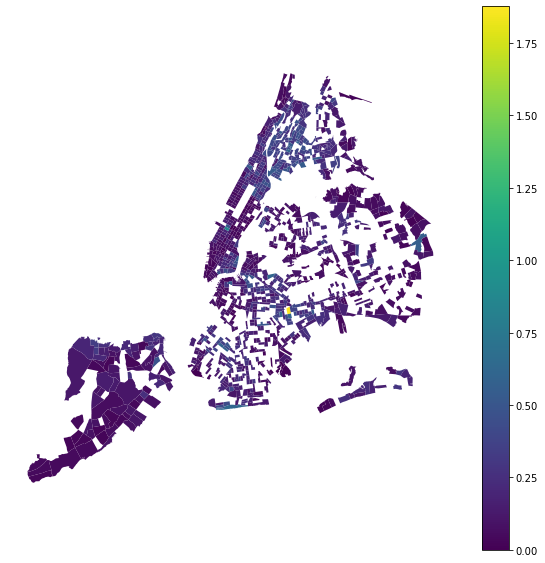

In [52]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot the choropleth
visit_count_merge_gdf.plot(ax=ax, column='pctPoverty',cmap="viridis", legend=True)

# Format
# ax.set_title("White percent of NY", fontsize=16)
ax.set_axis_off()

fig.savefig('../fig/white_percent.jpg')

In [1]:
visit_count_merge_gdf

NameError: name 'visit_count_merge_gdf' is not defined

In [57]:
feature_2=[
          '2019_tot','2020_tot','2021_tot',
          '2019_edu','2020_edu','2021_edu',
          '2019_tra','2020_tra','2021_tra',
          '2019_hea','2020_hea','2021_hea',
          '2019_who','2020_who','2021_who',
          '2019_foo','2020_foo','2021_foo',
          'tot_tra','tot_edu','tot_hea','tot_who','tot_foo','tot_tot',
          'borough','tract_id','pctPoverty'
         
         ]



### geojson data

In [60]:
# write data to geojson 
import shapely
def df_to_geojson(df, lat='latitude', lon='longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Polygon',
                               'coordinates':[]}}
        
        feature['geometry']= shapely.geometry.mapping(row.geometry)
        for prop in feature_2:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

geojson =df_to_geojson(visit_count_merge_gdf)

from geojson import Point, Feature, FeatureCollection, dump

with open('data_2.geojson', 'w') as f:
   dump(geojson, f)
    

In [61]:
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'2019_tot': 835,
    '2020_tot': 451,
    '2021_tot': 493,
    '2019_edu': 0.0,
    '2020_edu': 0.0,
    '2021_edu': 0.0,
    '2019_tra': 0.0,
    '2020_tra': 0.0,
    '2021_tra': 0.0,
    '2019_hea': 0.0,
    '2020_hea': 0.0,
    '2021_hea': 0.0,
    '2019_who': 0.0,
    '2020_who': 0.0,
    '2021_who': 0.0,
    '2019_foo': 0.0,
    '2020_foo': 0.0,
    '2021_foo': 0.0,
    'tot_tra': 0.0,
    'tot_edu': 0.0,
    'tot_hea': 0.0,
    'tot_who': 0.0,
    'tot_foo': 0.0,
    'tot_tot': 1779,
    'borough': 'Bronx',
    'tract_id': 36005000200,
    'pctPoverty': 0.2246520874751491},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-73.856517, 40.80525),
      (-73.856525, 40.805248),
      (-73.85664, 40.805272),
      (-73.856759, 40.805282),
      (-73.856879, 40.805302),
      (-73.85695, 40.805283),
      (-73.857046, 40.805303),
      (-73.857123, 40.805339),
      (-73.857204, 40.805334),
     